### Классификация изображений

#### Цель работы

Применить методы машинного обучения для решения задач классификации изображений.

#### Задания для выполнения

1. Загрузите датасет Olivetti faces;
2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в [документации](https://scikit-learn.org/stable/datasets/index.html#real-world-datasets).
3. Выведите информацию о количественных параметрах датасета;
4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;
5. Разделите эти данные на тестовую и обучающую выборки;
6. Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;
7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
    1. достоверность предсказания (accuracy);
    2. точность (precision);
    3. полнота (recall);
8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.
9. Сделайте вывод о применимости модели.


#### Методические указания

Датасет Olivetti faces - это один из известных модельных наборов данных для обучения методам классификации изображений. Его можно получить с помощью стандартных средств sklearn:

```py
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)
```

При работе с разными данными часто требуется выводить из на экран. Хотя это абсолютно не нужно для работы самих алгоритмов машинного обучения, зачастую проводится, например, анализ ошибок. Для этого нужно уметь выводить изображения стандартными средствами. В библиотеке matplotlib, например, можно воспользоваться функцией imshow:

```py
p.imshow(images[i], cmap=plt.cm.bone)
```

Более подробно про эту функцию можно прочитать в [документации](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imshow.html).

Методы машинного обучения библиотеки sklearn рассчитаны, что на вход будет подаваться плоский массив признаков. Однако, изображение - это двумерный объект. Можно разными способами превратить изображение в набор признаков. В нейронных моделях для этого используются свертки. Но самый простой способ - просто представить изображение как линейную последовательность пикселей. 

Если изображение имеет разрешение 64 на 64 пикселя, то всего пикселей получается 4096. Если изображение черно-белое (в градациях серого), то значением признака, соответствующего каждому пикселю можно взять яркость этого пикселя. Если изображение цветное, то каждому пикселю может соответствовать три разных признака. Причем обычно такие значения нормируются к шкале долей единицы.

Такой набор признаков уже можно использовать как исходные данные для машинного обучения. Далее алгоритм машинного обучения полностью совпадает с работой с численными данными.

#### Контрольные вопросы

1. Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?
2. Как представляется изображение в методах машинного обучения? От чего зависит размерность вектора признаков?
3. Какие задачи можно решать при помощи анализа изображений? Какие из них самые распространенные?
4. Какие известные датасеты изображений существуют? Для каких задач они применяются?

#### Дополнительные задания

1. Постройте модели классификации на основе следующих методов:
    1. логистическая регрессия (LogisticRegression);
    2. метод опорных векторов с гауссовым ядром (SVC);
    3. метод опорных векторов с полиномиальным ядром (SVC);
    4. метод k ближайших соседей (KNeighborsClassifier);
    5. многослойный перцептрон (MLP);
    6. другие методы по желанию;
2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;
3. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.
4. Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.
5. (*) Используйте сверточную нейронную сеть для решения той же задачи. Сравните ее эффективность и производительность с классическими моделями.


In [5]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import learning_curve
from sklearn.exceptions import ConvergenceWarning

In [6]:
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [7]:
# Что выведет на экран ячейка с кодом:
import xlwings as xw
import numpy as np

wb = xw.Book()
sht = wb.sheets['Лист1']
sht.range((2, 1)).value = np.arange(12, dtype=np.int).reshape((3,4))

print(sht.range('B3').value)

5.0


<ipython-input-7-2cb0012a3fc8>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sht.range((2, 1)).value = np.arange(12, dtype=np.int).reshape((3,4))


## Задания для выполнения

1. Загрузите датасет Olivetti faces;


In [8]:
# https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в [документации](https://scikit-learn.org/stable/datasets/index.html#real-world-datasets).


In [9]:
target = faces['target']
data = faces['images']

In [10]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [11]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


3. Выведите информацию о количественных параметрах датасета;


4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;


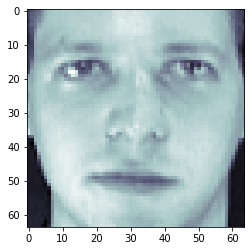

In [12]:
plt.imshow(faces.images[0], cmap=plt.cm.bone)

In [13]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

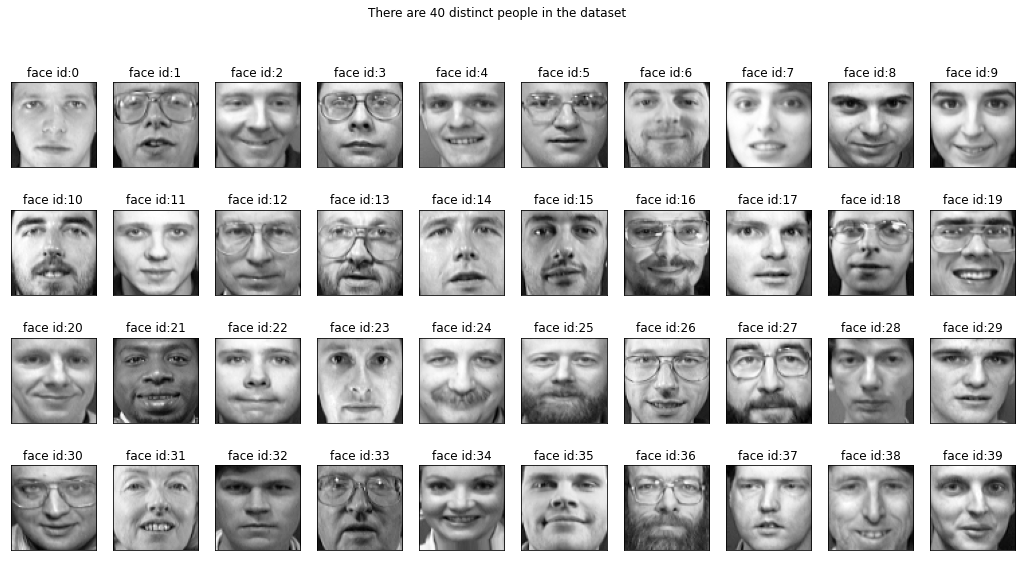

In [14]:
show_40_distinct_people(data, np.unique(target))

In [15]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

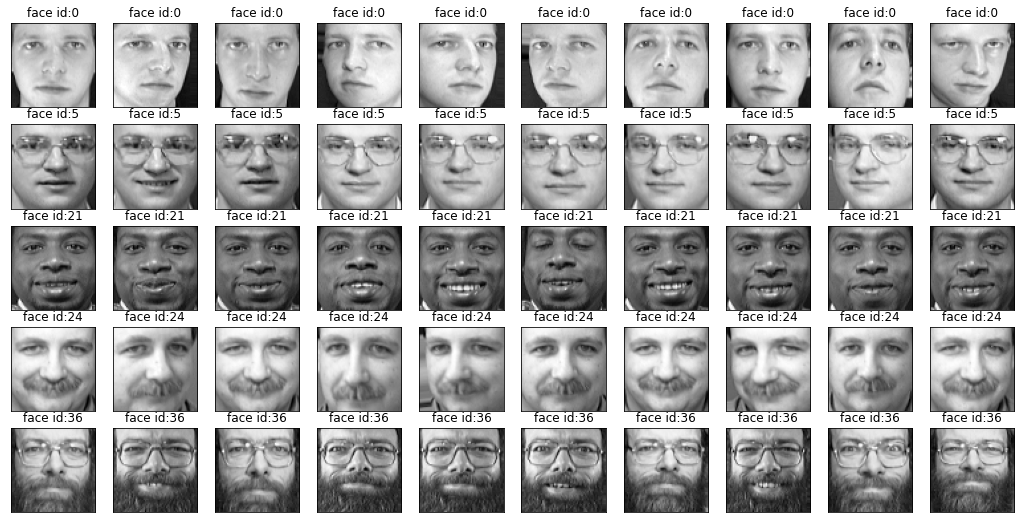

In [16]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

5. Разделите эти данные на тестовую и обучающую выборки;


In [17]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [18]:
x_train, x_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",x_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


6. Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;


In [197]:
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP'
    ]
)

In [198]:
def get_metrics(y_test, y_pred, average, zero_division):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average=average, zero_division=zero_division)
    recall = metrics.recall_score(y_test, y_pred, average=average, zero_division=zero_division)
    return pd.Series(
        (accuracy, precision, recall),
        index=['accuracy', 'precision', 'recall']
    )

In [199]:
def model_and_metrics(model, average="micro", zero_division="warn", ax_title=""):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    returned = get_metrics(y_test, y_pred, average=average, zero_division=zero_division)
    return returned

In [205]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()
#clf = svm.SVC(kernel='linear')
scores.iloc[0] = model_and_metrics(clf)

7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
    1. достоверность предсказания (accuracy);
    2. точность (precision);
    3. полнота (recall);


In [206]:
scores

,accuracy,precision,recall
LogisticRegression,0.9625,0.9625,0.9625
SVC linear,NaN,NaN,NaN
SVC gauss,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN
MLP,NaN,NaN,NaN


8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.


In [207]:
faces = fetch_olivetti_faces()

In [1]:
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    test_size=0.2,
                                                    random_state=True)

NameError: name 'train_test_split' is not defined

In [2]:
cls = LogisticRegression()
clf = svm.SVC(kernel='linear')
clf_rbf = svm.SVC(kernel='rbf')
neigh = KNeighborsClassifier()
mlp = MLPClassifier()
estimators = [cls, clf, clf_rbf, neigh, mlp]

NameError: name 'LogisticRegression' is not defined

In [3]:
for (name, score_series), estimator in zip(scores.iterrows(), estimators):
    score_series.update(model_and_metrics(estimator, average="weighted", zero_division=0, ax_title=name))
scores

NameError: name 'scores' is not defined

In [4]:
def scorer_precision(estimator, x, y):
    y_pred = estimator.predict(x)
    return metrics.precision_score(y, y_pred, average='weighted', zero_division=0)
    
def scorer_recall(estimator, x, y):
    y_pred = estimator.predict(x)
    return metrics.recall_score(y, y_pred, average='weighted', zero_division=0)
    
def show_statisctic(reg, x, y, title="", train_sizes=np.linspace(0.1, 1, 10), cv=5):
    plt.figure(figsize=(14,10))
    
    for name, scoring, color,linestyle in zip(
        ["accuracy","precision", "recall"],
        ["accuracy", scorer_precision, scorer_recall],
        ["r", "g", "b"],
        ["o-", "o--", "o--"]
    ):
        
        train_sizes, _, test_scores = learning_curve(
            reg,
            x,
            y,
            train_sizes=train_sizes,
            scoring=scoring,
            cv=cv,
        )
        test_scores[np.isnan(test_scores)] = 0
        plt.plot(train_sizes, test_scores.mean(1), linestyle, color=color, label=name)
        
    plt.xlabel("Train size")
    plt.ylabel("score")
    plt.title(title, fontsize=30)
    plt.legend(loc="best")
    plt.show()

NameError: name 'np' is not defined

In [5]:
for name, estimator in zip(scores.index, estimators):
    show_statisctic(
        estimator,
        faces.data,
        faces.target,
        title=name,
        train_sizes=np.linspace(0.3, 1, 8),
        cv=3
    )

NameError: name 'scores' is not defined

9. Сделайте вывод о применимости модели.

#### Дополнительные задания

1. Постройте модели классификации на основе следующих методов:
    1. логистическая регрессия (LogisticRegression);
    2. метод опорных векторов с гауссовым ядром (SVC);
    3. метод опорных векторов с полиномиальным ядром (SVC);
    4. метод k ближайших соседей (KNeighborsClassifier);
    5. многослойный перцептрон (MLP);
    6. другие методы по желанию;


2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


3. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.


4. Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.


In [31]:
import time

def model_and_time(model, average="micro", zero_division="warn", ax_title=""):
    
    start = time.time() # точка отсчета времени
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    
    end = time.time() - start # собственно время работы программы
    
    return end # вывод времени

In [32]:
time_score = pd.DataFrame(
    columns=['seconds'],
    index=[]
)
time_score

,seconds


In [37]:
for model in estimators:
    time_score.loc[model] = [model_and_time(model, average="weighted", zero_division=0, ax_title=name)]
time_score

,seconds
LogisticRegression(),3.605864
SVC(kernel='linear'),0.407238
SVC(),0.593364
KNeighborsClassifier(),0.015643
MLPClassifier(),5.932265


In [243]:
type(time_score['seconds'])

pandas.core.series.Series

In [245]:
type(scores['accuracy'])

pandas.core.series.Series

In [249]:
scores.drop(columns = ['seconds'],axis = 1, inplace=True )
scores

,accuracy,precision,recall
LogisticRegression,0.9625,0.965625,0.9625
SVC linear,0.9625,0.96875,0.9625
SVC gauss,0.8375,0.812083,0.8375
KNeighborsClassifier,0.8125,0.860863,0.8125
MLP,0.25,0.208542,0.25


In [251]:
lst = []
for i in time_score['seconds']:
    lst.append(i)

In [256]:
lst

[3.6058638095855713,
 0.4072384834289551,
 0.5933640003204346,
 0.01564311981201172,
 5.932264804840088]

In [258]:
scores['seconds'] = lst
scores

,accuracy,precision,recall,seconds
LogisticRegression,0.9625,0.965625,0.9625,3.605864
SVC linear,0.9625,0.96875,0.9625,0.407238
SVC gauss,0.8375,0.812083,0.8375,0.593364
KNeighborsClassifier,0.8125,0.860863,0.8125,0.015643
MLP,0.25,0.208542,0.25,5.932265


In [259]:
time_score['seconds']

LogisticRegression()      3.605864
SVC(kernel='linear')      0.407238
SVC()                     0.593364
KNeighborsClassifier()    0.015643
MLPClassifier()           5.932265
Name: seconds, dtype: object

In [255]:
scores['seconds'] = time_score['seconds']
# scores.seconds.update(time_score.seconds)
scores

,accuracy,precision,recall,seconds
LogisticRegression,0.9625,0.965625,0.9625,NaN
SVC linear,0.9625,0.96875,0.9625,NaN
SVC gauss,0.8375,0.812083,0.8375,NaN
KNeighborsClassifier,0.8125,0.860863,0.8125,NaN
MLP,0.25,0.208542,0.25,NaN


In [248]:
# df.insert(1, "D", 5)
scores.drop(columns = ['seconds'],axis = 1, inplace=True )
scores.insert(3, "seconds", time_score['seconds'])
# scores['seconds'] = time_score[seconds]
scores

,accuracy,precision,recall,seconds
LogisticRegression,0.9625,0.965625,0.9625,NaN
SVC linear,0.9625,0.96875,0.9625,NaN
SVC gauss,0.8375,0.812083,0.8375,NaN
KNeighborsClassifier,0.8125,0.860863,0.8125,NaN
MLP,0.25,0.208542,0.25,NaN


In [40]:
for (name, score_series), estimator in zip(time_score.iterrows(), estimators):
    score_series.update(model_and_time(estimator, average="weighted", zero_division=0, ax_title=name))
time_score

,seconds
LogisticRegression(),3.605864
SVC(kernel='linear'),0.407238
SVC(),0.593364
KNeighborsClassifier(),0.015643
MLPClassifier(),5.932265


5.(*) Используйте сверточную нейронную сеть для решения той же задачи. Сравните ее эффективность и производительность с классическими моделями.

In [41]:
# https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
target = faces['target']
data = faces['images']

x_train, x_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",x_train.shape)
print("y_train shape:{}".format(y_train.shape))

#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

In [194]:
X = faces['images']

train_images, test_images, train_labels, test_labels = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# train_images = tf.expand_dims(train_images, axis=0)
# train_labels = tf.expand_dims(train_labels, axis=0)
train_labels.reshape(280, 1)
test_labels.reshape(120, 1)
train_images.reshape(280, 64, 64, 1)
test_images.reshape(120, 64, 64, 1)

array([[[[0.00128018],
         [0.00181494],
         [0.00217145],
         ...,
         [0.00238211],
         [0.0023335 ],
         [0.0023497 ]],

        [[0.00136121],
         [0.00186356],
         [0.00213904],
         ...,
         [0.0023497 ],
         [0.0023659 ],
         [0.0023497 ]],

        [[0.00145843],
         [0.00191217],
         [0.00209042],
         ...,
         [0.0023497 ],
         [0.00238211],
         [0.0023659 ]],

        ...,

        [[0.00139362],
         [0.00137741],
         [0.00137741],
         ...,
         [0.00129639],
         [0.00139362],
         [0.00142602]],

        [[0.00137741],
         [0.00136121],
         [0.00136121],
         ...,
         [0.00131259],
         [0.00139362],
         [0.00142602]],

        [[0.001345  ],
         [0.00136121],
         [0.0013288 ],
         ...,
         [0.00129639],
         [0.00140982],
         [0.00142602]]],


       [[[0.0006644 ],
         [0.00223627],
         [0.00

In [168]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# # Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0
# train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [126]:
test_images.shape

(120, 64, 64)

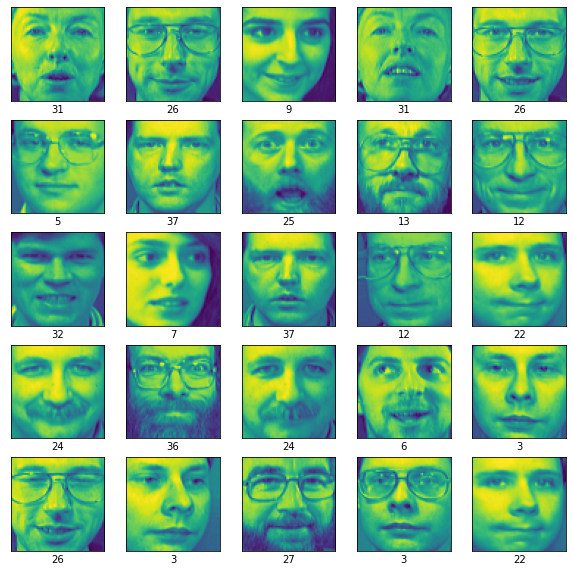

In [195]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

In [186]:
model = models.Sequential()
model.add(layers.Conv2D(64, 1, activation='relu', input_shape=(64, 64, 1))) # размерность изображений
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 1, activation='relu'))

In [187]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 64, 64, 64)        128       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        4160      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 64)        4160      
                                                                 
Total params: 8,448
Trainable params: 8,448
Non-train

In [188]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(40)) # столько же, сколько и количество классов

In [189]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 64, 64, 64)        128       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        4160      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 64)        4160      
                                                                 
 flatten_10 (Flatten)        (None, 16384)           

In [190]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
9/9 [==============================] - 2s 190ms/step - loss: 3.6904 - accuracy: 0.0036 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 2/10
9/9 [==============================] - 1s 140ms/step - loss: 3.6899 - accuracy: 0.0250 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 3/10
9/9 [==============================] - 1s 138ms/step - loss: 3.6893 - accuracy: 0.0107 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 4/10
9/9 [==============================] - 1s 145ms/step - loss: 3.6891 - accuracy: 0.0179 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 5/10
9/9 [==============================] - 1s 154ms/step - loss: 3.6891 - accuracy: 0.0143 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 6/10
9/9 [==============================] - 1s 148ms/step - loss: 3.6891 - accuracy: 0.0250 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 7/10
9/9 [==============================] - 1s 157ms/step - loss: 3.6891 - accuracy: 0.0250 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 8/10
9/9 [====

In [191]:
history.history['accuracy']

[0.0035714285913854837,
 0.02500000037252903,
 0.010714286006987095,
 0.01785714365541935,
 0.014285714365541935,
 0.02500000037252903,
 0.02500000037252903,
 0.010714286006987095,
 0.02142857201397419,
 0.0071428571827709675]

4/4 - 0s - loss: 3.6889 - accuracy: 0.0250 - 169ms/epoch - 42ms/step


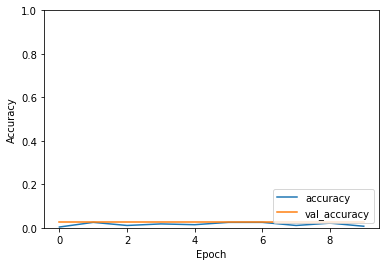

In [193]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [159]:
print(test_acc)

0.02500000037252903


In [196]:
# слои, активаторы, функции потерь, оптимайзер

In [ ]:
# уменьшить количесвто нейронов и слоев 